<a href="https://colab.research.google.com/github/gabrielfea/supermarket_gps/blob/main/supermarket_gps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#GPS_SUPERMARKET - PROTÓTIPO

##### Copyright 2024 Google LLC.

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [1]:
!pip install -q -U google-generativeai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 150.7/150.7 kB 1.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 677.8/677.8 kB 10.6 MB/s eta 0:00:00


### Import packages

In [2]:
import pathlib
import textwrap

import google.generativeai as genai

from IPython.display import display
from IPython.display import Markdown


def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

In [3]:
# Used to securely store your API key
from google.colab import userdata

In [4]:
# Or use `os.getenv('GOOGLE_API_KEY')` to fetch an environment variable.
GOOGLE_API_KEY=userdata.get('GOOGLE_API_KEY-L6Y')

genai.configure(api_key=GOOGLE_API_KEY)

In [5]:
for m in genai.list_models():
  if 'generateContent' in m.supported_generation_methods:
    print(m.name)

models/gemini-1.0-pro
models/gemini-1.0-pro-001
models/gemini-1.0-pro-latest
models/gemini-1.0-pro-vision-latest
models/gemini-1.5-pro-latest
models/gemini-pro
models/gemini-pro-vision


## Generate text from image and text inputs

Gemini provides a multimodal model (`gemini-pro-vision`) that accepts both text and images and inputs. The `GenerativeModel.generate_content` API is designed to handle multimodal prompts and returns a text output.

Let's include an image:

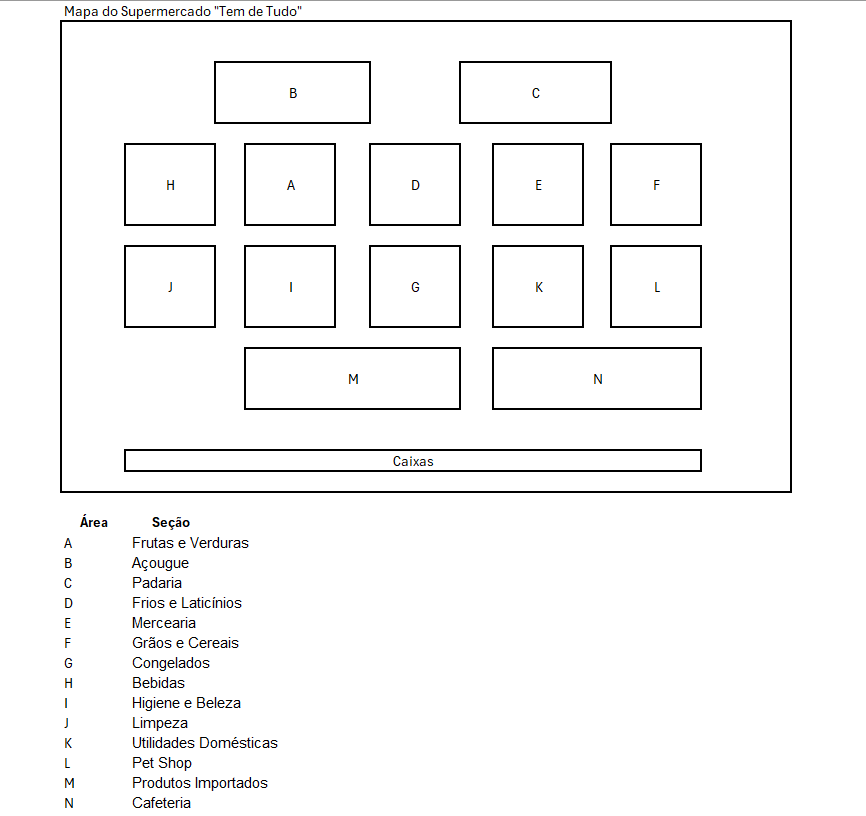

In [6]:
import PIL.Image

img = PIL.Image.open('mapa_mercado.png')
img

Use the `gemini-pro-vision` model and pass the image to the model with `generate_content`.

In [7]:
model = genai.GenerativeModel('gemini-pro-vision')

In [8]:
response = model.generate_content(img)

to_markdown(response.text)

>  O setor de frios e laticínios está localizado na área B.

To provide both text and images in a prompt, pass a list containing the strings and images:

In [10]:
instrucoes = "Baseado na imagem em anexo que representa o mapa de um mercado, me sugira o melhor caminho para eu fazer minhas compras, sem andar muito, sabendo a lista de compras que irei passar em seguida. Faça eu comprar as carnes por último para elas não ficarem muito tempo no carrinho e ao final das compras me dirija ao caixa. responda de forma elegante, separando as seções e deixando fácil a leitura dos itens por seção."
lista = "Preciso comprar tomate, batata , alface, cebola, picanha, carvão, ração para a Naja, acendedor de churrasqueira, sal grosso, cerveja, e refrigerante."
query = instrucoes+lista
response = model.generate_content([instrucoes+lista, img], stream=False)
response.resolve()
to_markdown(response.text)

>  ### **Seção de Hortifrúti (Seção A)**
> - Tomate
> - Batata
> - Alface
> - Cebola
> 
> ### **Seção de Carnes (Seção B)**
> - Picanha
> 
> ### **Seção de Utilidades Domésticas (Seção I)**
> - Carvão
> - Acendedor de churrasqueira
> - Sal grosso
> 
> ### **Seção de Bebidas (Seção H)**
> - Cerveja
> - Refrigerante
> 
> ### **Seção de Pet Shop (Seção N)**
> - Ração para a Naja
> 
> Após passar por todas as seções, siga para o **caixa (Seção M)** para efetuar o pagamento.

In [19]:
while True:
  instrucoes = "Baseado na imagem em anexo que representa o mapa de um mercado, me sugira o melhor caminho para eu fazer minhas compras, sem andar muito, sabendo a lista de compras que irei passar em seguida. "
  forma = "Imprima o resultado dividindo por seção, por tópicos, e só mostrando o caminho para os itens da lista de compra passada. Só apresente seções dos produtos da lista. Seja objetivo. "
  lista = input("Digite a lista de compras: ")
  query = instrucoes+lista
  response = model.generate_content([instrucoes+forma+lista, img], stream=False)
  response.resolve()
  print(response.text)
  if input("Deseja sair? (s/n) ") == 's':
    break
  else:
    continue

Digite a lista de compras: Picanha, Contra-Filet, Peito de Frango, batata, cenoura, limão, abóbora cambotchã, champignon, azeite, palmito, salame, pão, shoyo, kit yakisoba, macarrão de yakisoba, bisteca, costelinha barbecue, barbecue, linguiça, carvão, vinho, refri, batata palha, tempero pronto para arroz, pimentão, mussarela, danone de mel e laranja.
 **Seção de Frios e Laticínios**
- Picanha
- Contra-Filet
- Peito de Frango
- Mussarela
- Salame
- Pão
- Danone de Mel e Laranja

**Seção de Hortifrúti**
- Batata
- Cenoura
- Limão
- Abóbora cabotiá
- Champignon
- Palmito
- Pimentão

**Seção de Bebidas**
- Azeite
- Shoyu
- Vinho
- Refri

**Seção de Mercearia**
- Kit Yakisoba
- Macarrão de Yakisoba
- Bisteca
- Costelinha barbecue
- Barbecue
- Linguiça
- Carvão
- Tempero pronto para arroz
- Batata palha
Deseja sair? (s/n) s
